In [2]:
from mpl_toolkits import mplot3d
from astropy.io import fits
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('../Data/allFLYs.pkl', 'rb') as pickle_file:
    allFLYs = pickle.load(pickle_file, encoding = 'latin1')

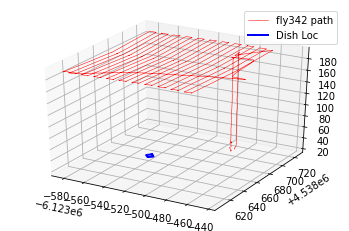

In [16]:
#visualizing flight paths for the flights
#for i in range(len(allFLYs)):
x = allFLYs[1]['x']
y = allFLYs[1]['y']
z = allFLYs[1]['z']
    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x,y,z, linewidth=0.5, color = 'red', label = 'fly'+allFLYs[1]['FLY']+' path')
dishX = [-6.12354322e+06, -6.12353927e+06,-6.12354284e+06,-6.12354663e+06,-6.12354322e+06]
dishY = [4.53866934e+06, 4.53866568e+06,4.53866241e+06,4.53866555e+06, 4.53866934e+06]
dishZ = [1.70000000e+01, 1.70000000e+01, 1.70000000e+01, 1.70000000e+01, 1.70000000e+01]
ax.plot(dishX, dishY, dishZ, color = 'blue', linewidth = 2, label = 'Dish Loc')
ax.legend()
plt.savefig('flightpath342.png')

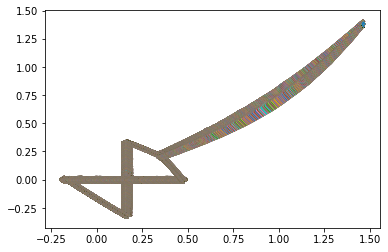

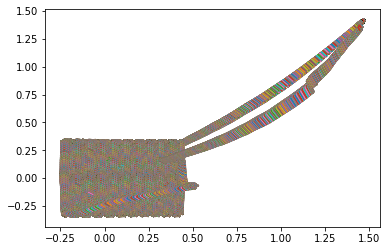

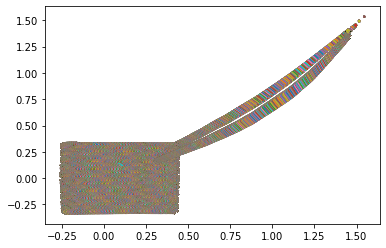

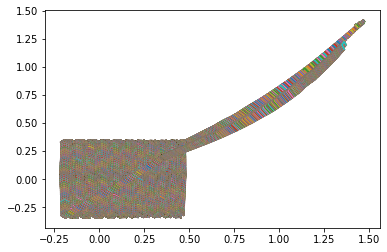

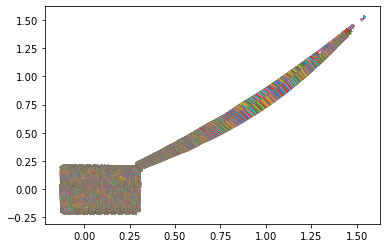

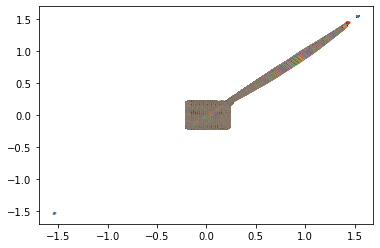

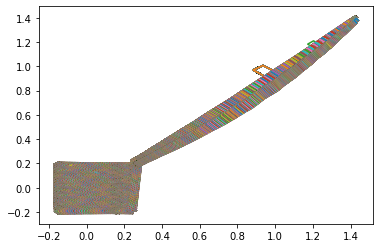

In [18]:
#visualizing beam?

for i in range(len(allFLYs)):
    thetax = allFLYs[i]['thetaX']
    thetay = allFLYs[i]['thetaY']
    
    plt.figure()
    plt.plot(thetax,thetay)

In [3]:
#experimenting with synching the drone and bmx time stamps
#drone time stamps are more finely gridded than bmx is
#BMX: 32.78 timestamps/s
#Drone: 96.95 timestamps/s

time_drone = allFLYs[0]['mjdD']
time_telescope = allFLYs[0]['mjdB']

time_drone_trimmed = []
maximum = max(time_telescope)
minimum = min(time_telescope)
for i in range(len(time_drone)):
    if time_drone[i]<=maximum and time_drone[i]>=minimum:
        time_drone_trimmed.append(time_drone[i])

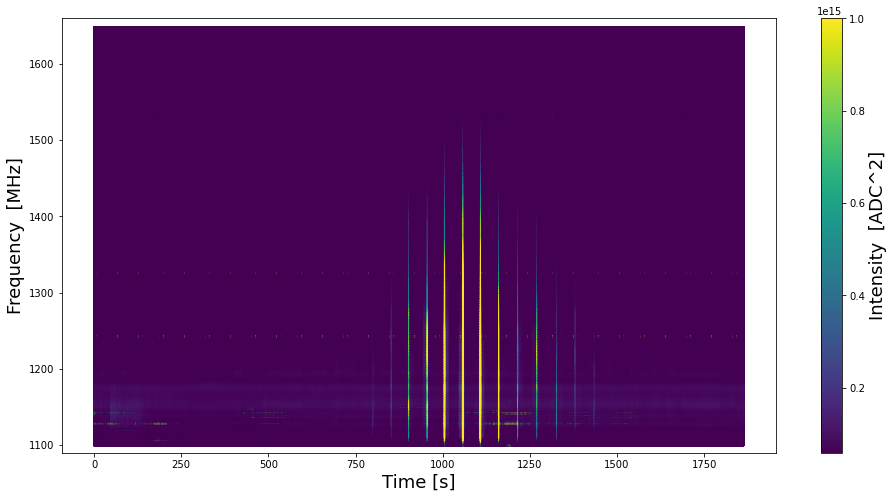

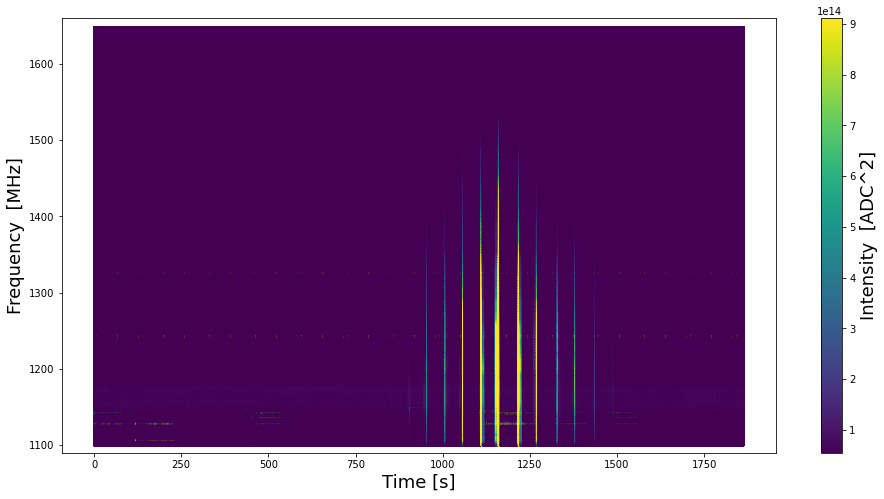

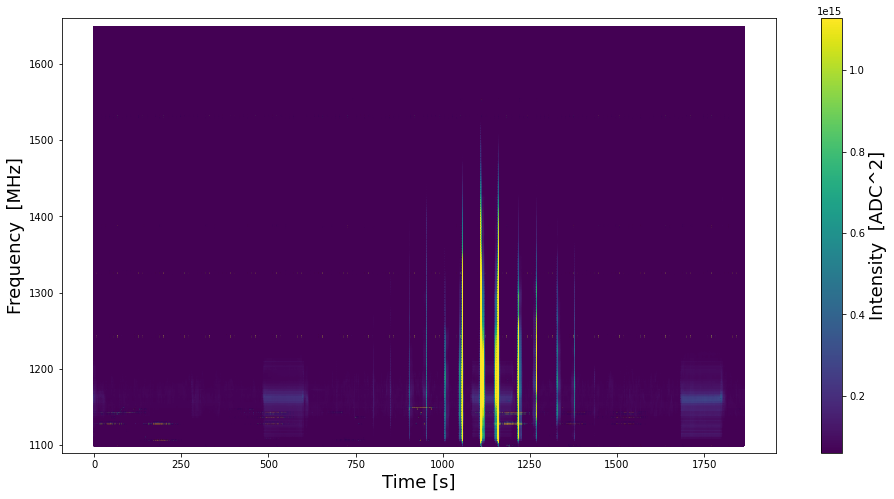

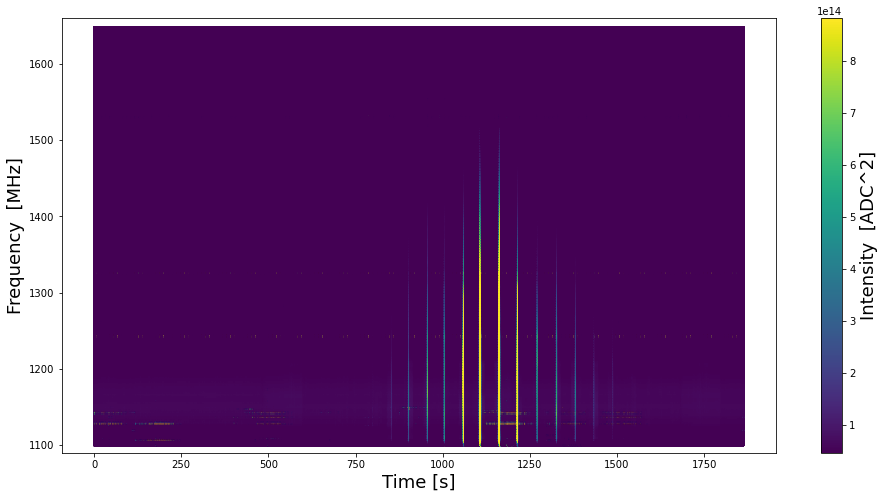

In [40]:
#autos array: 1 array for each dish
#each array has 47501 data points (spread out over time)
#each data point is the signal in each of the 256 freq bands
#goal: Produce plot for each dish, intensity in color domain, freq in y, time in x

#specifying some global variables

flight = allFLYs[2]
time = flight['mjdB']
zeropoint = min(time)
freq_min = 1100.0
freq_max = 1650.0
n_channels = 256.0
y_axis_freq_multiplier = (freq_max-freq_min)/n_channels
ndata = len(flight['autos'][0])*len(flight['autos'][0][0])

for i in range(len(flight['autos'])):
    
    #getting data into plottable format
    x_time = np.zeros(ndata)
    y_freq = np.zeros(ndata)
    c_intensity = np.zeros(ndata)
    
    for j in range(len(time)):
        time_converted = (time[j]-zeropoint)*86400
        for k in range(0,256):
            index = j*256 + k
            
            x_time[index] = x_time[index]+time_converted
            y_freq[index] = y_freq[index]+(freq_min+(k*y_axis_freq_multiplier))
            c_intensity[index] = c_intensity[index] + flight['autos'][i][j][k]
    
    #scaling the color bar
    intensity_mean = np.mean(c_intensity)
    intensity_std = np.std(c_intensity)
    color_min = intensity_mean
    color_max = intensity_mean + 2*intensity_std
    
    #plotting data
    fig = plt.figure(figsize=(16,8))
    c = plt.scatter(x_time, y_freq, c = c_intensity, s=1, cmap = 'viridis', vmin = color_min, vmax = color_max)
    cbar = plt.colorbar(c)
    cbar.set_label('Intensity  [ADC^2]', fontsize = 18)
    plt.ylim(1090,1660)
    plt.xlabel('Time [s]', fontsize = 18)
    plt.ylabel('Frequency  [MHz]', fontsize = 18)
    
    fig.savefig('../Data/plots/waterfallpreliminary_droneflight'+str(flight['FLY'])+'_dish'+str(i+1)+'.png', dpi=300, dtype = 'png')